<a href="https://colab.research.google.com/github/ShahdTarek/Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv('/content/train (2).csv')

In [4]:
df.sample(7)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2748,SD,87,area_code_415,no,yes,33,125.0,99,21.25,235.3,81,20.00,215.3,95,9.69,10.2,7,2.75,2,no
1484,CT,77,area_code_415,no,no,0,245.2,87,41.68,254.1,83,21.60,239.4,91,10.77,7.5,4,2.03,0,yes
962,MN,95,area_code_408,no,yes,32,262.2,123,44.57,165.2,82,14.04,194.3,57,8.74,10.6,5,2.86,0,no
583,WV,121,area_code_415,no,no,0,103.3,110,17.56,129.1,82,10.97,167.1,113,7.52,10.7,3,2.89,0,no
1232,HI,118,area_code_415,no,no,0,133.4,113,22.68,121.0,92,10.29,254.7,129,11.46,5.9,4,1.59,1,no
700,IL,81,area_code_415,no,yes,31,210.4,100,35.77,225.5,97,19.17,168.7,120,7.59,9.7,4,2.62,0,no
1150,ND,51,area_code_510,no,no,0,227.2,89,38.62,194.4,106,16.52,243.4,126,10.95,14.9,2,4.02,0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
encoding = LabelEncoder()
col = df.columns

In [7]:
df[col] =df[col].apply(LabelEncoder().fit_transform)


In [8]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,106,1,0,1,20,737,86,737,832,64,740,1378,65,732,116,3,116,1,0
1,31,136,1,0,0,0,1483,77,1483,195,71,185,513,66,319,101,5,101,0,0
2,35,83,0,1,0,0,1788,34,1788,18,49,18,842,51,473,45,7,45,2,0
3,36,74,1,1,0,0,784,76,784,393,83,359,744,83,428,80,3,80,3,0
4,19,120,2,0,1,18,1261,51,1261,1768,69,1567,991,80,544,54,7,54,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,82,1,0,0,0,981,33,981,1293,49,1137,1002,41,549,82,6,82,0,0
4246,49,72,0,0,0,0,883,52,883,259,43,243,737,51,425,94,6,94,3,0
4247,27,74,0,0,0,0,821,64,821,810,87,720,235,66,173,48,7,48,1,0
4248,11,49,0,0,1,34,1418,90,1418,1099,87,969,1656,78,903,78,5,78,2,0


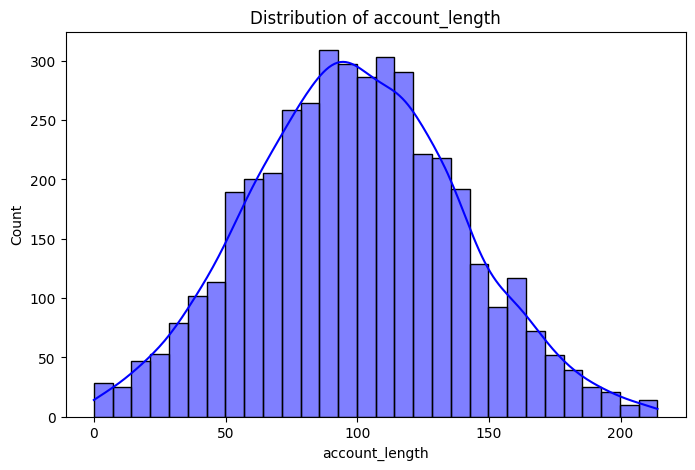

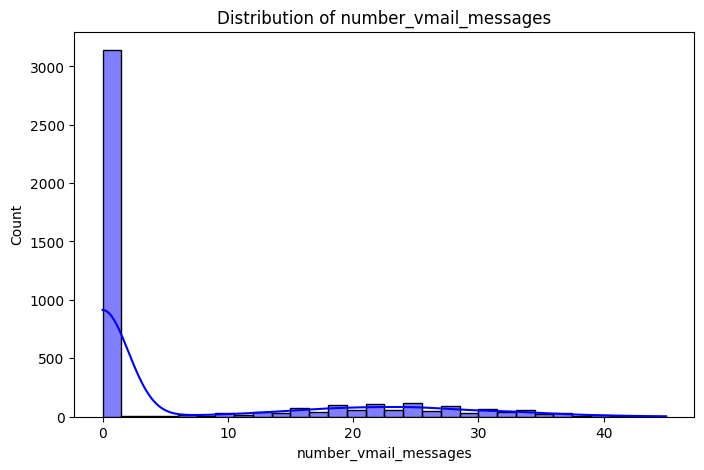

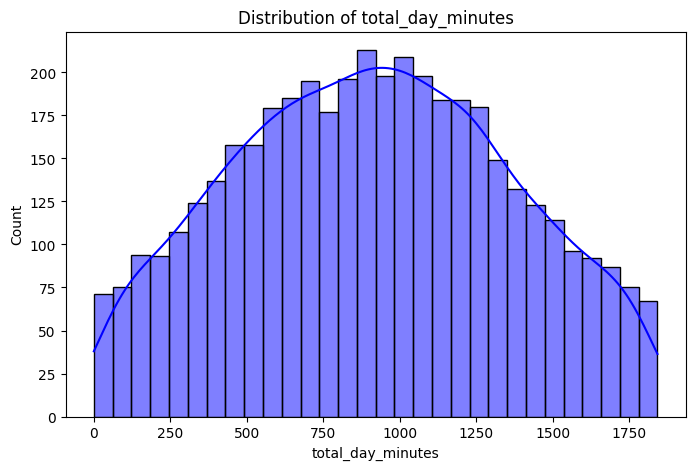

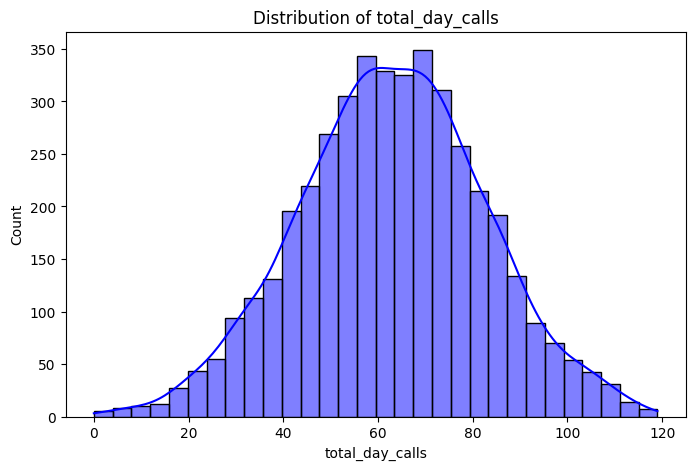

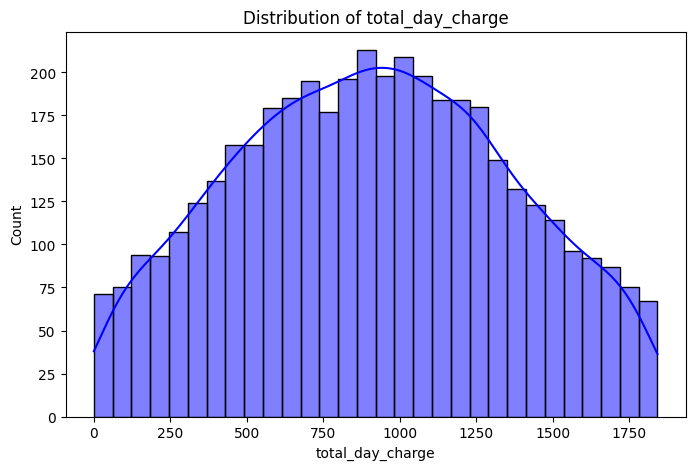

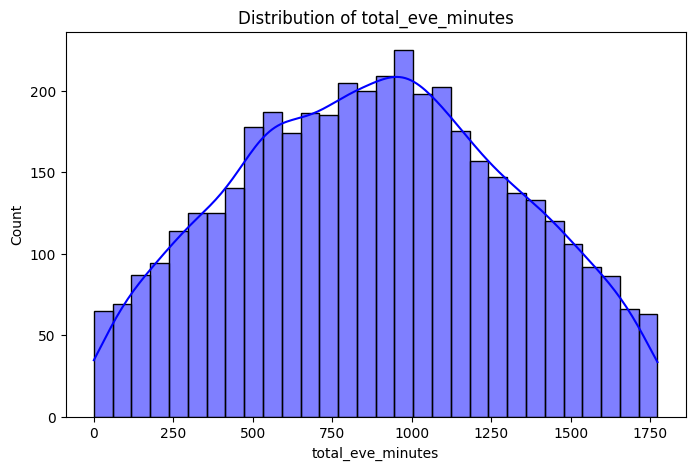

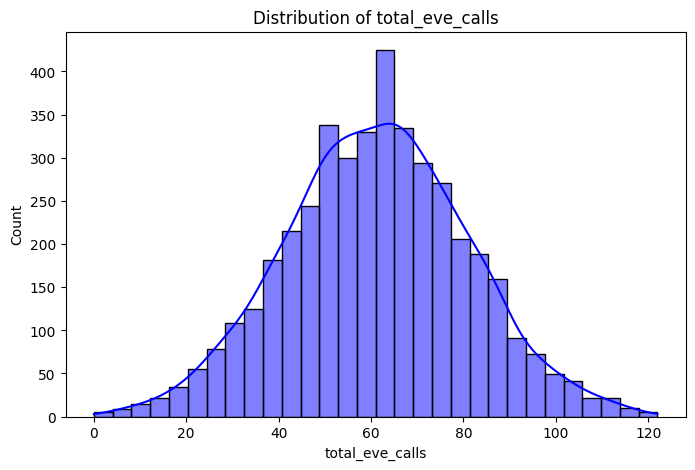

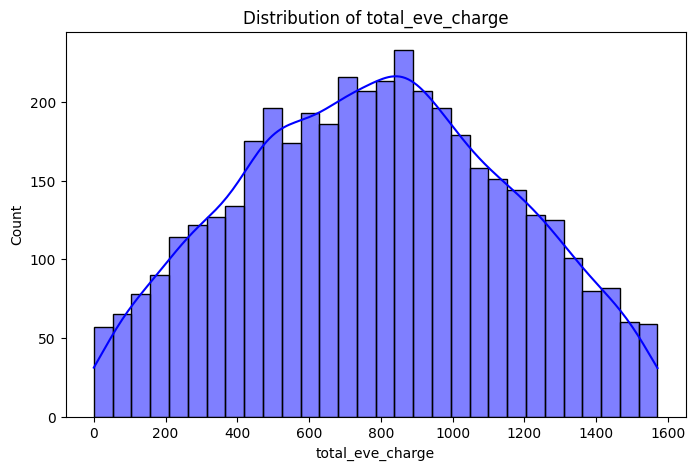

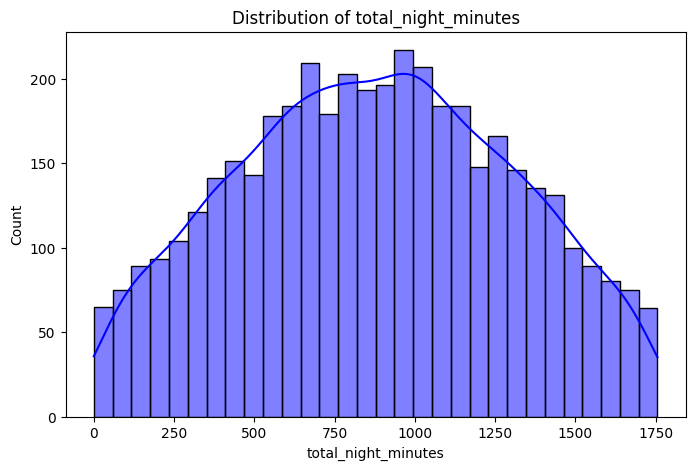

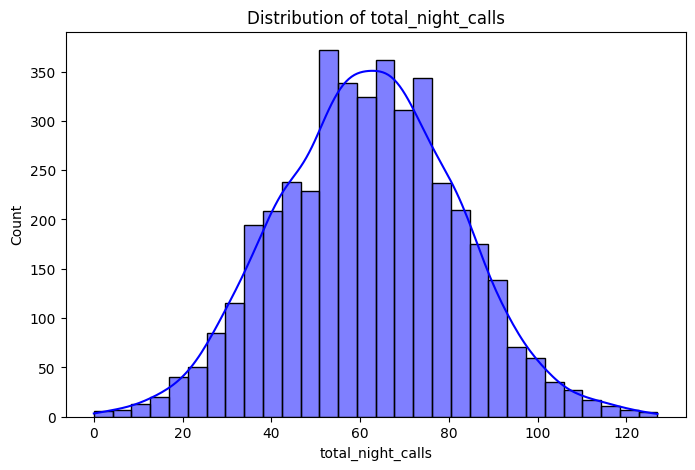

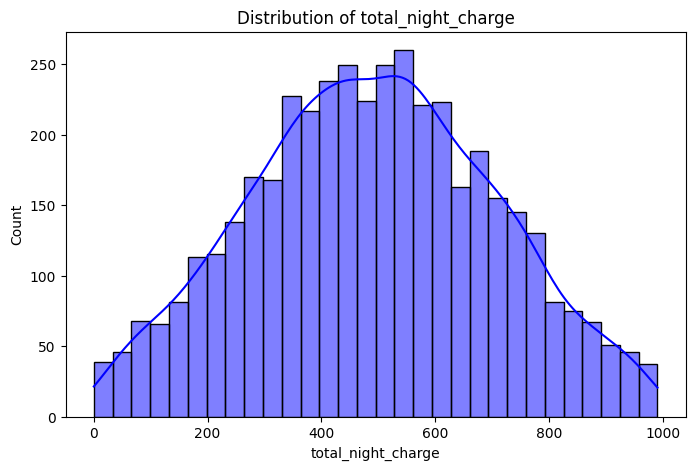

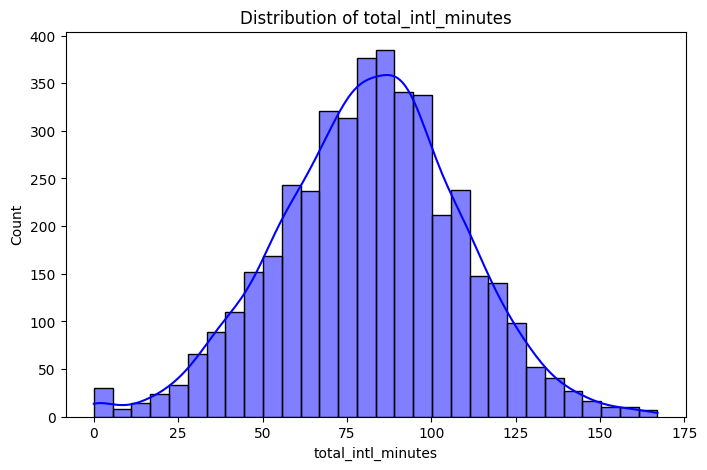

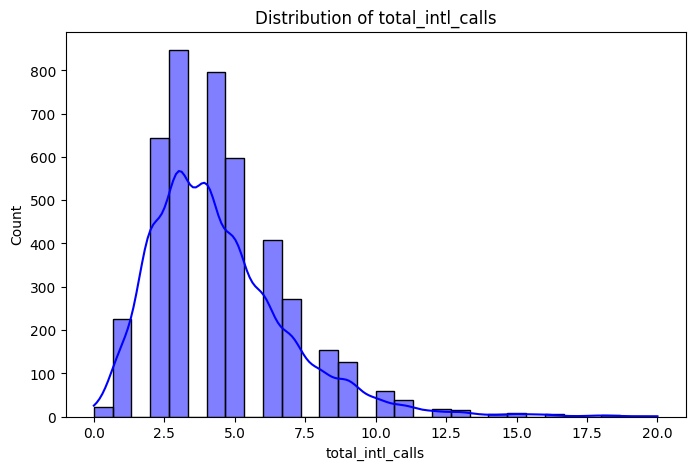

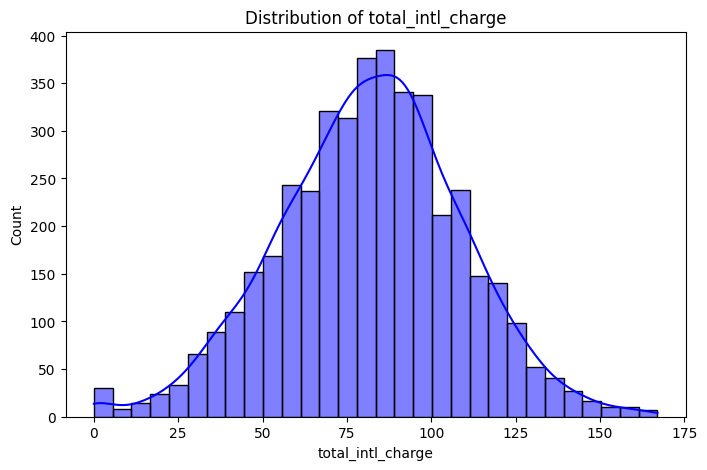

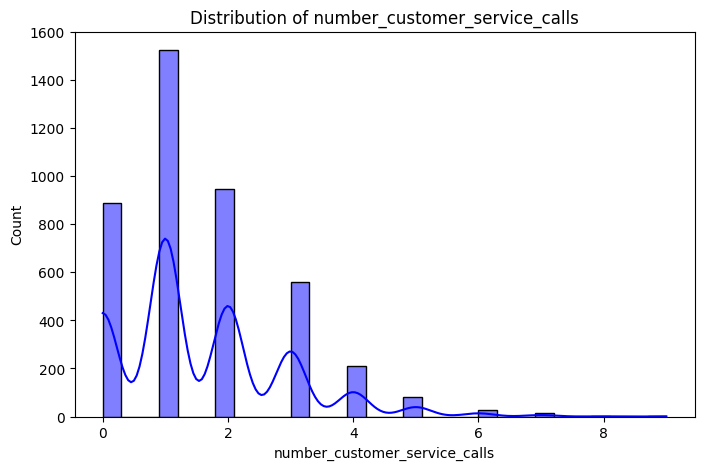

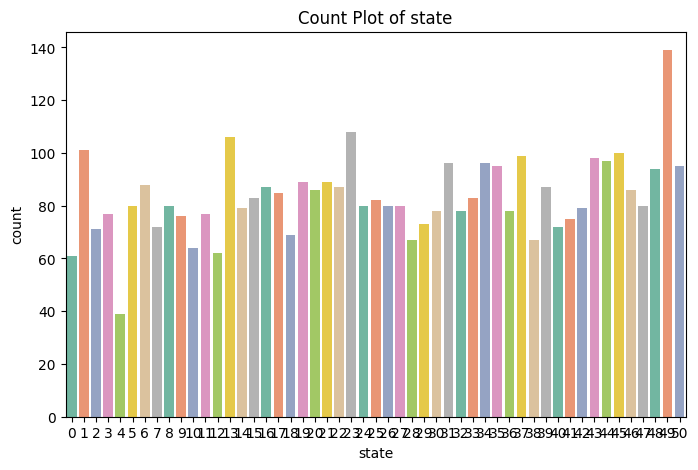

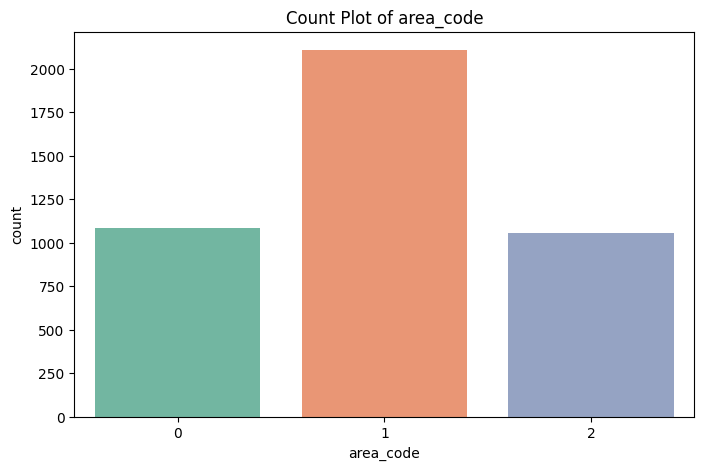

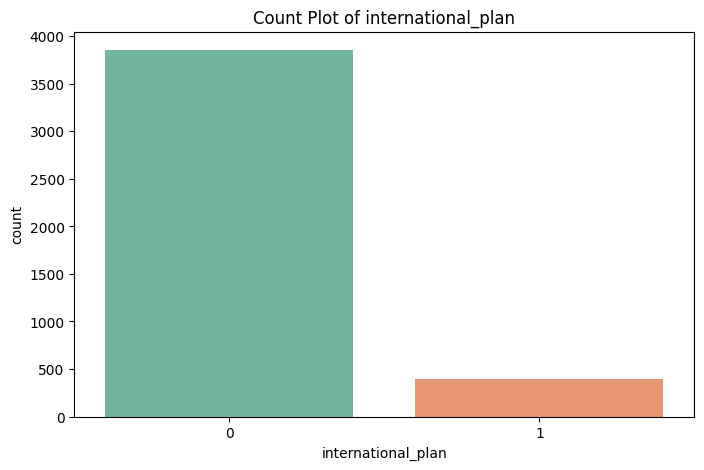

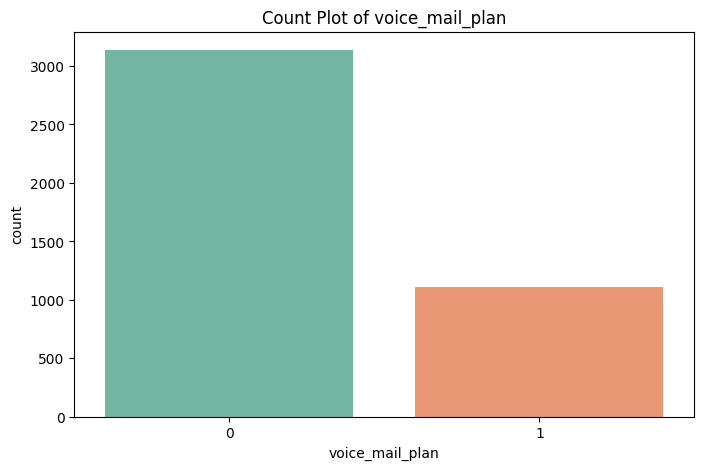

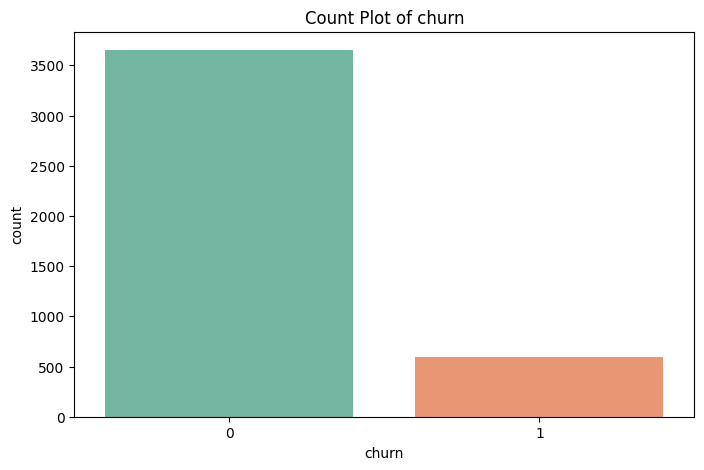

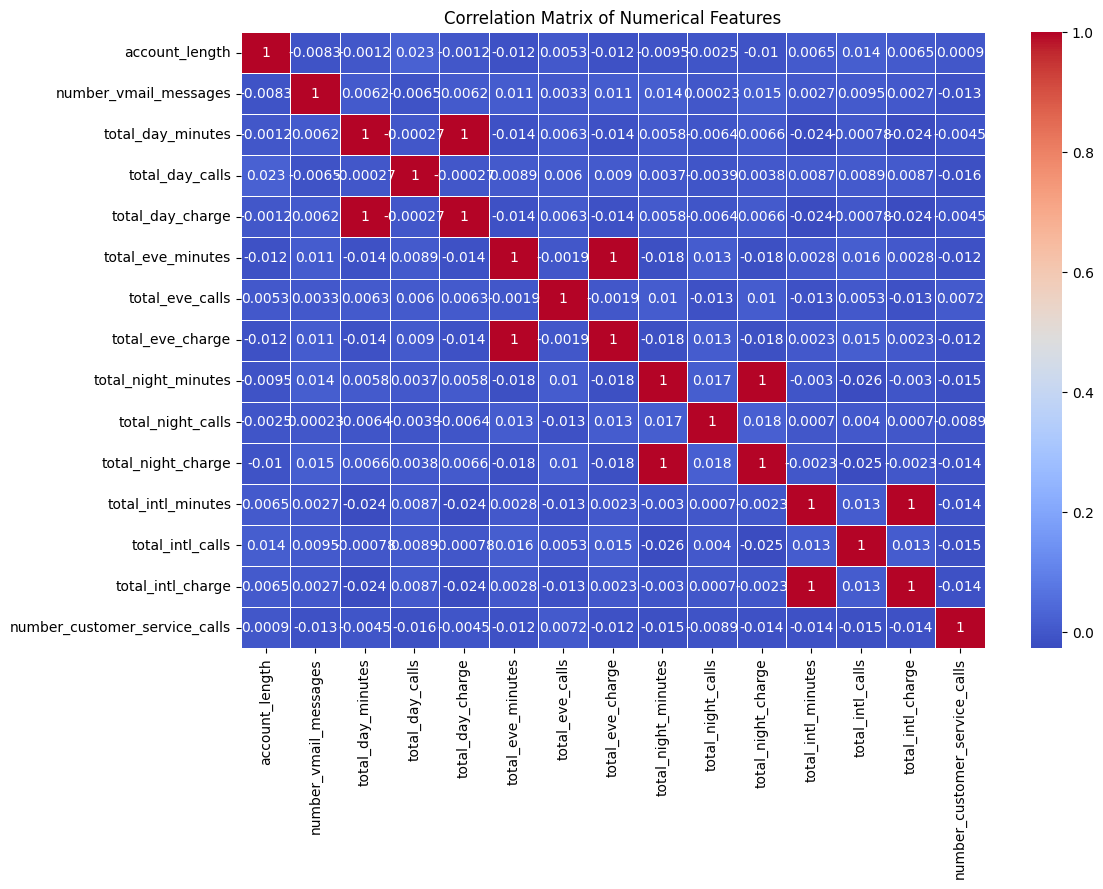

In [9]:
numeric_features = [
    'account_length', 'number_vmail_messages', 'total_day_minutes',
    'total_day_calls', 'total_day_charge', 'total_eve_minutes',
    'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
    'total_night_calls', 'total_night_charge', 'total_intl_minutes',
    'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls'
]
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize count plots for categorical features
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.show()

# Correlation matrix for numerical features
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

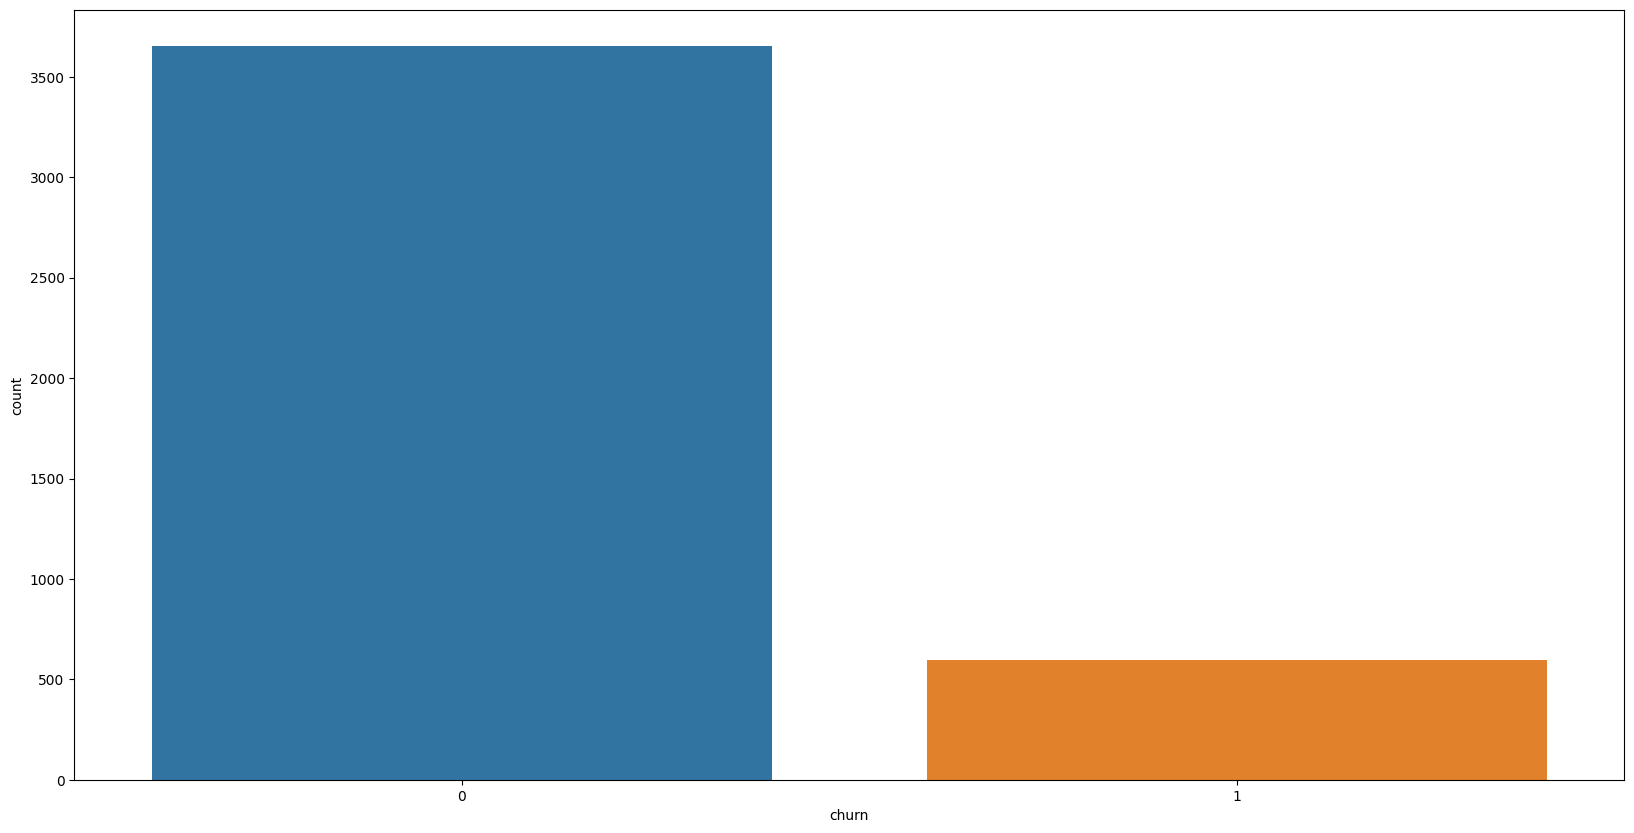

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='churn', data=df)
plt.show()

In [12]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [13]:
# data imbalance
df['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [14]:
X = df.iloc[:,:-1]
y = df['churn']

In [15]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [16]:
X_over, y_over = undersample.fit_resample(X, y)

In [17]:
y_over

0       0
1       0
2       0
3       0
4       0
       ..
1191    1
1192    1
1193    1
1194    1
1195    1
Name: churn, Length: 1196, dtype: int64

In [18]:
X_over

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,44,60,1,1,1,23,428,82,428,607,44,547,1347,76,716,96,6,96,3
1,20,66,1,0,0,0,828,43,828,133,42,128,828,73,466,98,4,98,2
2,45,105,0,0,0,0,768,83,768,1638,40,1445,1342,102,713,60,2,60,0
3,2,95,1,0,1,15,1515,58,1515,1401,111,1230,475,34,301,87,6,87,2
4,23,58,1,0,0,0,1379,56,1379,572,53,516,1404,86,744,93,5,93,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,30,113,2,1,1,22,501,56,501,592,51,533,789,35,449,125,4,125,2
1192,21,89,1,0,0,0,250,67,250,600,67,541,477,61,302,66,5,66,4
1193,32,136,0,1,0,0,1814,73,1814,1175,34,1034,178,40,138,85,2,85,1
1194,28,139,2,0,0,0,1492,78,1492,1421,62,1247,1169,74,628,54,6,54,1


In [19]:
X_over,X_test,y_over,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# -----KNN-----------------------------

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn_model.fit(X_over, y_over)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(X_over)
knn_model.score(X_over, y_over)

0.9008823529411765

In [23]:
print(classification_report(y_over, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2917
           1       0.80      0.40      0.54       483

    accuracy                           0.90      3400
   macro avg       0.85      0.69      0.74      3400
weighted avg       0.89      0.90      0.89      3400



# -----LogisticRegression-------------

In [24]:
scale = StandardScaler()

In [25]:
X_train = scale.fit_transform(X_over)
X_test = scale.fit_transform(X_test)

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train,y_over)

LogisticRegression()

In [31]:
y_pred = log_model.predict(X_train)

In [32]:
log_model.score(X_train, y_over)

0.8626470588235294

In [33]:
print(classification_report(y_over, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2917
           1       0.55      0.19      0.28       483

    accuracy                           0.86      3400
   macro avg       0.71      0.58      0.60      3400
weighted avg       0.83      0.86      0.83      3400

